## Perform KMeans clustering for the crime data to obtain optimum number of clusters.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sweetviz
import dtale
from AutoClean import AutoClean
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from clusteval import clusteval

In [4]:
df_crime = pd.read_csv(r'D:\360digi\DS\Sharath\KMeans_Clustering\handson\Dataset_Assignment Clustering_K Means\crime_data.csv')
df_crime 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
#rename the column 'Unnamed: 0'
df_crime = df_crime.rename(columns = {'Unnamed: 0': 'State'})
df_crime.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### EXPLORATORY DATA ANALYSIS (EDA)

In [7]:
df_crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
# We have to check unique values for categorical data
df_crime.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [10]:
df_crime.State.unique().size

50

In [11]:
df_crime.State.value_counts()

Alabama           1
Pennsylvania      1
Nevada            1
New Hampshire     1
New Jersey        1
New Mexico        1
New York          1
North Carolina    1
North Dakota      1
Ohio              1
Oklahoma          1
Oregon            1
Rhode Island      1
Alaska            1
South Carolina    1
South Dakota      1
Tennessee         1
Texas             1
Utah              1
Vermont           1
Virginia          1
Washington        1
West Virginia     1
Wisconsin         1
Nebraska          1
Montana           1
Missouri          1
Mississippi       1
Arizona           1
Arkansas          1
California        1
Colorado          1
Connecticut       1
Delaware          1
Florida           1
Georgia           1
Hawaii            1
Idaho             1
Illinois          1
Indiana           1
Iowa              1
Kansas            1
Kentucky          1
Louisiana         1
Maine             1
Maryland          1
Massachusetts     1
Michigan          1
Minnesota         1
Wyoming           1


In [12]:
#check missing values
df_crime.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [14]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [13]:
# # Dividing categorical and numerical variables from the dataset

In [15]:
numeric_feature = df_crime.select_dtypes(exclude = ['object']).columns

In [16]:
numeric_feature

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [17]:
categorical_feature = df_crime.select_dtypes(include = ['object']).columns

In [18]:
categorical_feature

Index(['State'], dtype='object')

In [19]:
from sklearn_pandas import DataFrameMapper

In [26]:
categ_pipeline = Pipeline([('label', DataFrameMapper([(categorical_feature, LabelEncoder())]))])

In [29]:
preprocess_pipeline = ColumnTransformer([('categorical', categ_pipeline, categorical_feature)], remainder = 'passthrough')

In [31]:
processed = preprocess_pipeline.fit(df_crime)

In [33]:
df_new = pd.DataFrame(processed.transform(df_crime))

In [34]:
df_new

,0,1,2,3,4
0,0.0,13.2,236.0,58.0,21.2
1,1.0,10.0,263.0,48.0,44.5
2,2.0,8.1,294.0,80.0,31.0
3,3.0,8.8,190.0,50.0,19.5
4,4.0,9.0,276.0,91.0,40.6
5,5.0,7.9,204.0,78.0,38.7
6,6.0,3.3,110.0,77.0,11.1
7,7.0,5.9,238.0,72.0,15.8
8,8.0,15.4,335.0,80.0,31.9
9,9.0,17.4,211.0,60.0,25.8


### Scaling with Normalization - MinMaxScaler

In [44]:
new_features = df_new.select_dtypes(exclude=['object']).columns

In [45]:
new_features

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [46]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [47]:
preprocess_pipeline2 = ColumnTransformer([('scale', scale_pipeline, new_features)], remainder = 'passthrough')

In [48]:
processed2 = preprocess_pipeline2.fit(df_new)

In [49]:
df_crime1 = pd.DataFrame(processed2.transform(df_new))

In [50]:
df_crime1

,0,1,2,3,4
0,0.000000,0.746988,0.654110,0.440678,0.359173
1,0.020408,0.554217,0.746575,0.271186,0.961240
2,0.040816,0.439759,0.852740,0.813559,0.612403
3,0.061224,0.481928,0.496575,0.305085,0.315245
4,0.081633,0.493976,0.791096,1.000000,0.860465
5,0.102041,0.427711,0.544521,0.779661,0.811370
6,0.122449,0.150602,0.222603,0.762712,0.098191
7,0.142857,0.307229,0.660959,0.677966,0.219638
8,0.163265,0.879518,0.993151,0.813559,0.635659
9,0.183673,1.000000,0.568493,0.474576,0.478036


In [74]:
df_crime1.describe()

,0,1,2,3,4
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.500000,0.420964,0.430685,0.568475,0.360000
std,0.297498,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.197289,0.219178,0.381356,0.200904
50%,0.500000,0.388554,0.390411,0.576271,0.330749
75%,0.750000,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Clustering Model Building

## KMeans Clustering

In [51]:
# Libraries for creating scree plot or elbow curve 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [52]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_crime1)
    TWSS.append(kmeans.inertia_)

TWSS

[10.325376650233054,
 8.565057901620623,
 7.079178156772914,
 5.759945618765595,
 5.230931669181009,
 4.599752846187184,
 4.186583907027293]

### Creating a scree plot to find out no.of cluster

Text(0, 0.5, 'total_within_SS')

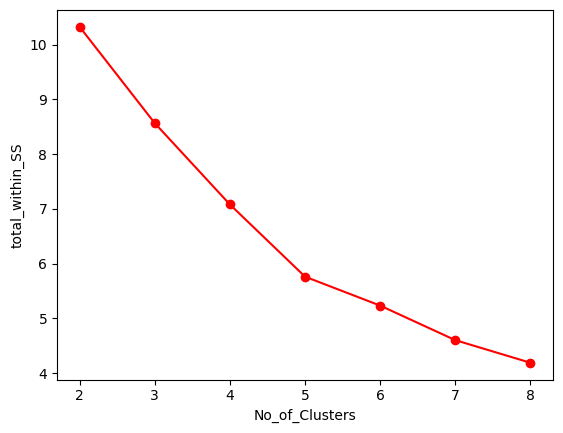

In [53]:
plt.plot(k, TWSS, 'ro-'); plt.xlabel("No_of_Clusters"); plt.ylabel("total_within_SS")

### Using KneeLocator

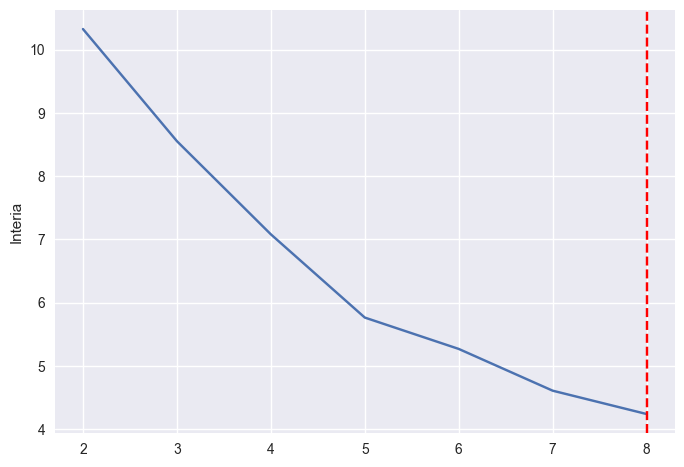

In [54]:
List = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters = k, init = "random", max_iter = 30, random_state = 1, n_init = 10) 
    kmeans.fit(df_crime1)
    List.append(kmeans.inertia_)

from kneed import KneeLocator
kl = KneeLocator(range(2, 9), List, curve = 'convex')
# kl = KneeLocator(range(2, 9), List, curve='convex', direction = 'decreasing')
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2, 9), List)
plt.xticks(range(2, 9))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show() 

In [55]:
model = KMeans(n_clusters = 5)
yy = model.fit(df_crime1)

In [56]:
model.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 3,
       0, 1, 4, 0, 0, 3, 2, 4, 3, 4, 1, 2, 4, 4, 4, 4, 4, 1, 2, 4, 4, 4,
       2, 4, 4, 2, 2, 4])

In [57]:
mb = pd.Series(model.labels_) 

In [58]:
df_crime['clust'] = mb

In [59]:
df_crime.head()

,State,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [61]:
x = df_crime.iloc[:, 1:].values

In [63]:
df_crime.iloc[:, 1:].columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape', 'clust'], dtype='object')

### 3D Scatter plot

<IPython.core.display.Javascript object>


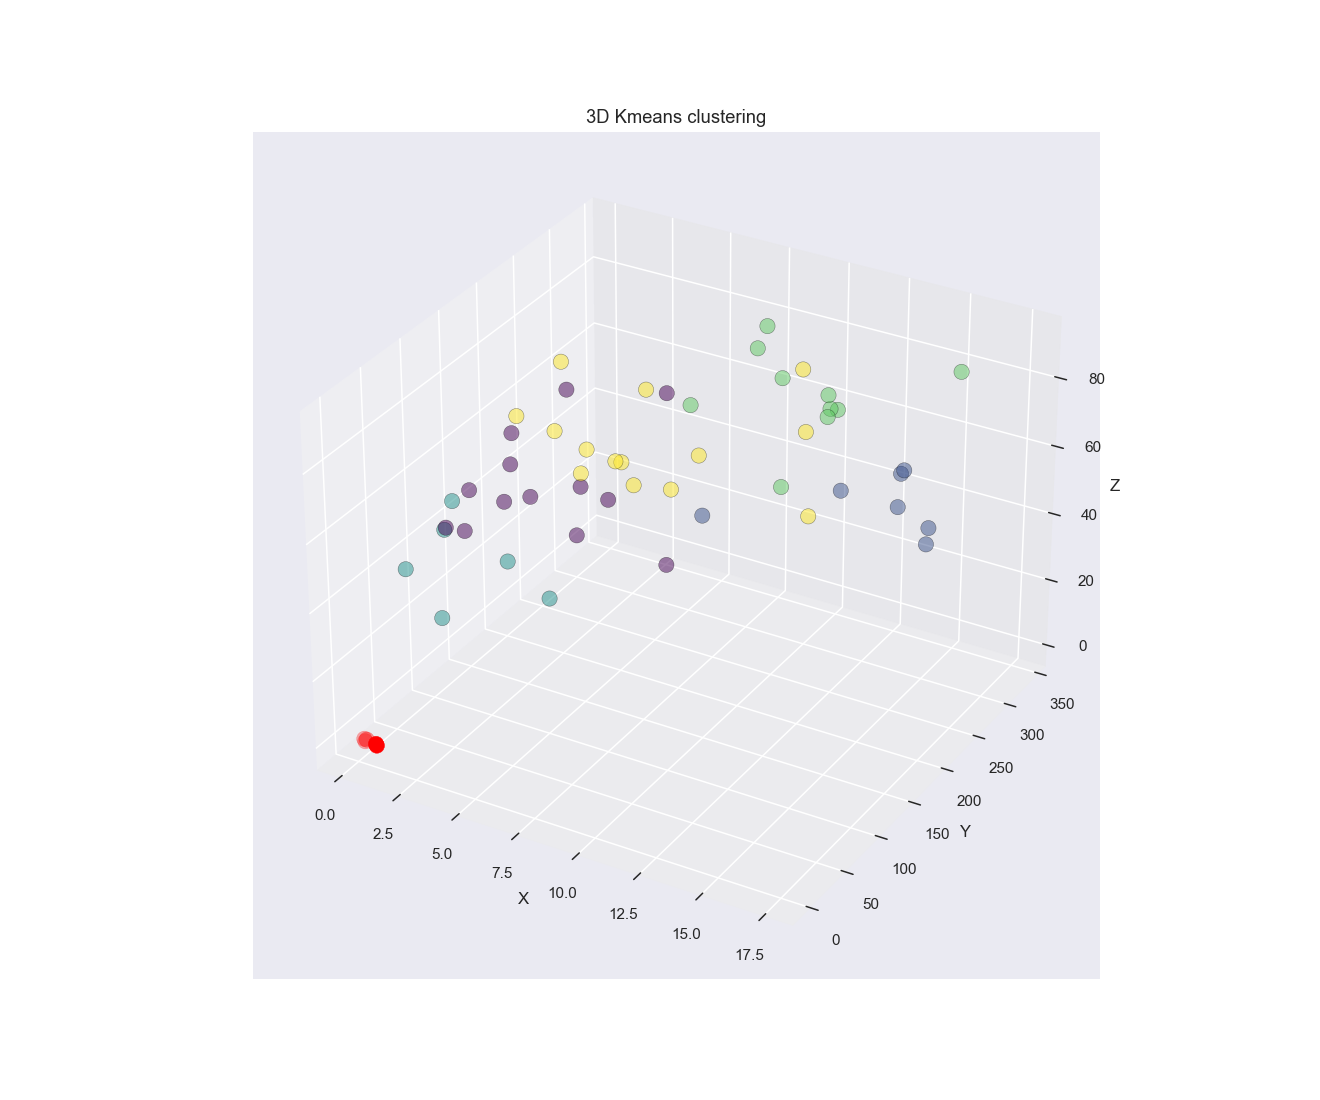

In [64]:
# plot clusters and centroids
%matplotlib notebook
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection = '3d')
#syntax
##ax.scatter(x , y , z , c = , cmap = , marker = , edgecolor = , s = , alpha)
ax.scatter(x[:,0], x[:,1], x[:,2], c = model.labels_, cmap = 'viridis', marker = 'o', edgecolor = 'k', s = 100, alpha = 0.5)
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], model.cluster_centers_[:,2], s = 100, c = 'r', marker = 'o', label = 'Centroid')
ax.set_title("3D Kmeans clustering")
ax.set_xlabel("X")
ax.set_ylabel("Y")   
ax.set_zlabel("Z")
plt.show()

## Cluster Evaluation

#### Silhouette coefficient:

In [65]:
from sklearn import metrics

In [66]:
metrics.silhouette_score(df_crime1, model.labels_)

0.2743376888078012

#### Calinski Harabasz:

In [69]:
metrics.calinski_harabasz_score(df_crime1, model.labels_)

22.77149712818036

#### Davies-Bouldin Index:

In [70]:
metrics.davies_bouldin_score(df_crime1, model.labels_)

1.132289271539681

### Evaluation of Number of Clusters using Silhouette Coefficient Technique

In [71]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range (2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df_crime1)
    score = silhouette_score(df_crime1, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [72]:
silhouette_coefficients

[[2, 0.345107806969667],
 [3, 0.26472498233910274],
 [4, 0.2747619069999468],
 [5, 0.27726058064036885],
 [6, 0.23494916047805303],
 [7, 0.2541274147310693],
 [8, 0.23457000863029095],
 [9, 0.23757113344752212],
 [10, 0.18053228977741853]]

In [73]:
sorted(silhouette_coefficients, reverse = True, key = lambda x: x[1])

[[2, 0.345107806969667],
 [5, 0.27726058064036885],
 [4, 0.2747619069999468],
 [3, 0.26472498233910274],
 [7, 0.2541274147310693],
 [9, 0.23757113344752212],
 [6, 0.23494916047805303],
 [8, 0.23457000863029095],
 [10, 0.18053228977741853]]

### Silhouette Coeffficients shows, the number of clusters k = 2 as the best value.

In [ ]:
## Using the report from clusteval library building 2 clusters

In [75]:
from clusteval import clusteval
import numpy as np

# Cluster evaluation.
ce = clusteval(cluster = 'kmeans', evaluate = 'silhouette', max_clust = 10)

In [76]:
df_array = np.array(df_crime1)

In [77]:
df_array.shape

(50, 5)


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.58it/s]

[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


<IPython.core.display.Javascript object>


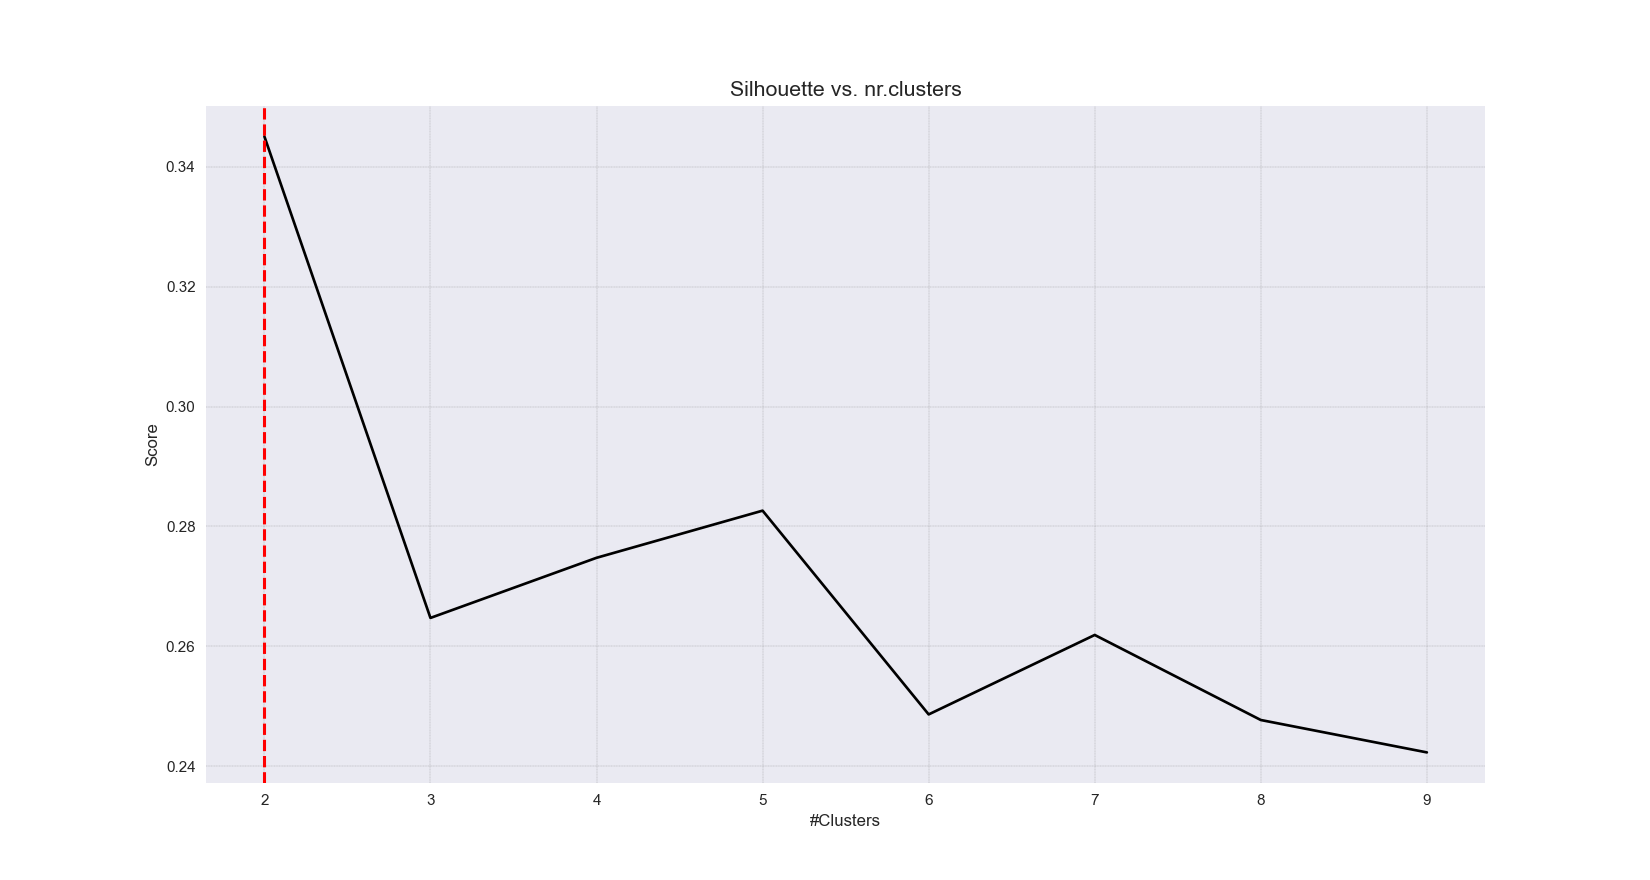

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [78]:
# Fit
ce.fit(df_array)

# Plot
ce.plot()

[clusteval] >Estimated number of n_clusters: 1, average silhouette_score=0.345


<IPython.core.display.Javascript object>


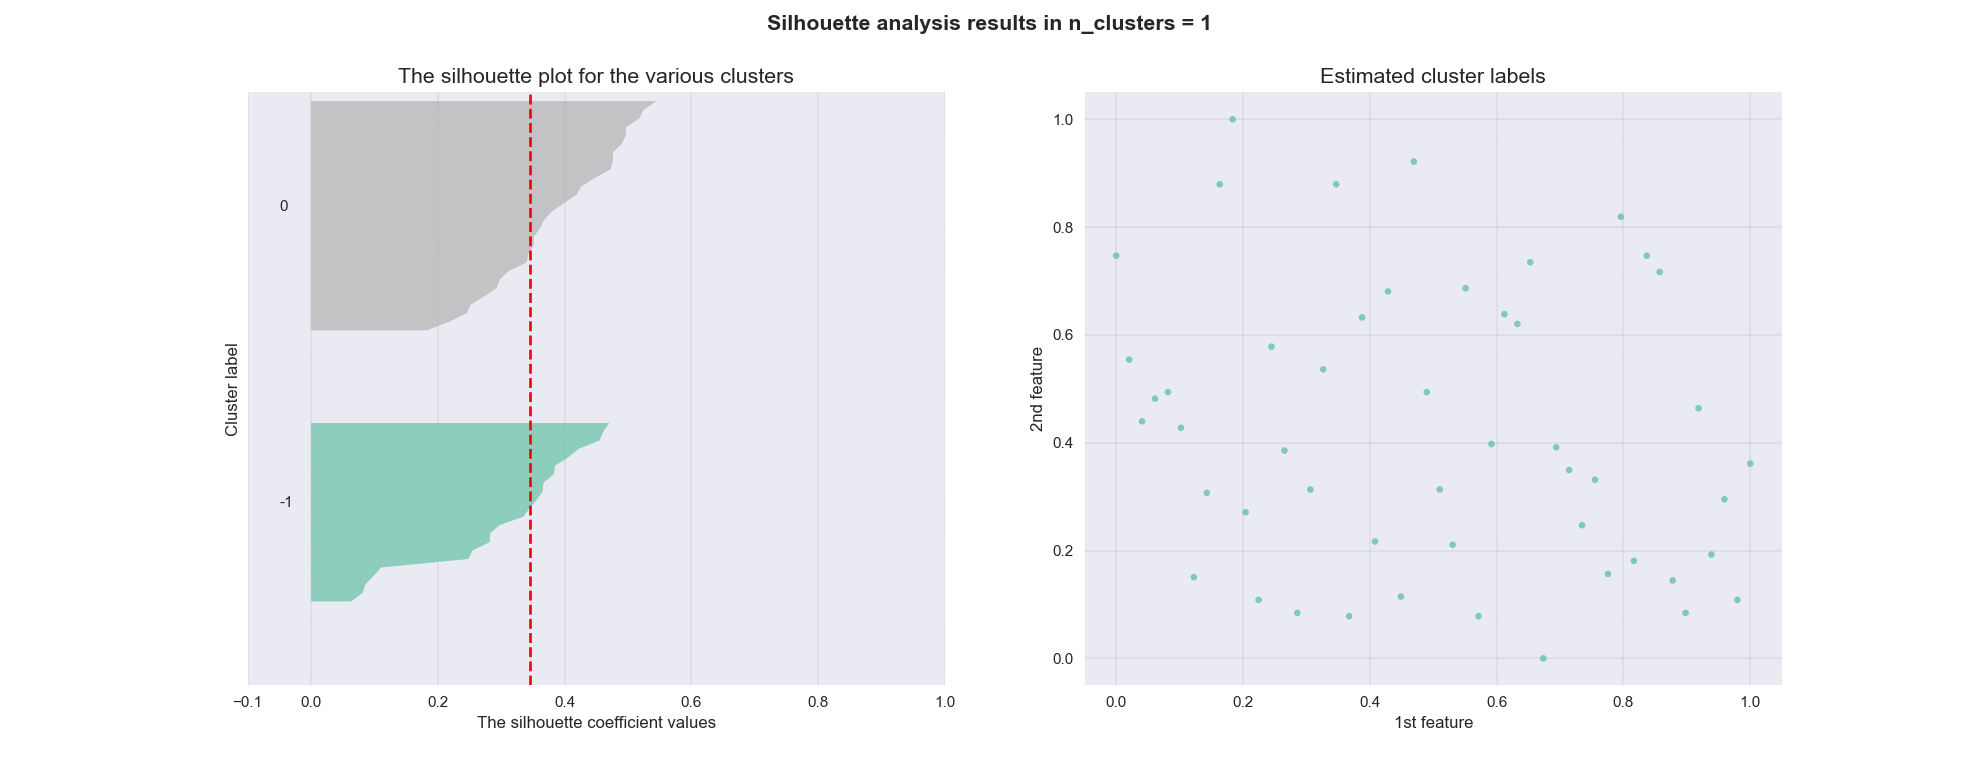

(<Figure size 1800x700 with 2 Axes>,
 <AxesSubplot:title={'center':'The silhouette plot for the various clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <AxesSubplot:title={'center':'Estimated cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [79]:
ce.scatter(df_array)

In [83]:
# Applying KMeans with = 2 as clusters
model1 = KMeans(n_clusters = 2)
yy = model1.fit(df_crime1)

In [84]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [90]:
mb = pd.Series(model1.labels_) 

In [91]:
df_crime['cluster'] = mb

In [95]:
df_crime.head()

,State,Murder,Assault,UrbanPop,Rape,clust,cluster
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,3,1
2,Arizona,8.1,294,80,31.0,3,1
3,Arkansas,8.8,190,50,19.5,1,1
4,California,9.0,276,91,40.6,3,1


In [93]:
# Aggregate mean of each cluster
df_crime.iloc[:, 1:5].groupby(df_crime.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,4.692857,107.321429,63.821429,15.821429
1,11.727273,251.500000,67.727273,28.118182


In [94]:
df1 = df_crime.sort_values(by = 'cluster', ascending = True)
df1

,State,Murder,Assault,UrbanPop,Rape,clust,cluster
49,Wyoming,6.8,161,60,15.6,4,0
29,New Jersey,7.4,159,89,18.8,4,0
28,New Hampshire,2.1,57,56,9.5,2,0
34,Ohio,7.3,120,75,21.4,4,0
26,Nebraska,4.3,102,62,16.5,0,0
25,Montana,6.0,109,53,16.4,0,0
48,Wisconsin,2.6,53,66,10.8,2,0
35,Oklahoma,6.6,151,68,20.0,4,0
22,Minnesota,2.7,72,66,14.9,0,0
36,Oregon,4.9,159,67,29.3,4,0
